In [1]:
# pip install pytket

In [2]:
# pip install pytket-qiskit

## Circuit Construction

In [3]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(2) #initialize the circuit class acting on two qubits
circ.H(0).CX(0,1)

render_circuit_jupyter(circ)

## Statevector Simulator

In [4]:
from pytket.extensions.qiskit import AerStateBackend
import numpy as np

backend = AerStateBackend() #initialize backend with default settings
result = backend.run_circuit(circ) #interface for running circuit on a given backend to obtain results
result_state = result.get_state() #for results we get the full state vector of the output

print(f"State vector -> {np.round(result_state, 3)}")   # prints (0,0), (1,0), (0,1), (1,1) states

State vector -> [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


show results in plot

In [5]:
###########################################
# Needed code in order to plot results
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_state_probs(state):
    state_dict = {'State':[i for i in range(len(result_state))], 'Probability':abs(state)**2}
    state_df = pd.DataFrame(state_dict)
    sns.catplot(x='State', y='Probability', kind='bar', data=state_df, aspect = 3, height=2)
    plt.show()
#######################################################################  

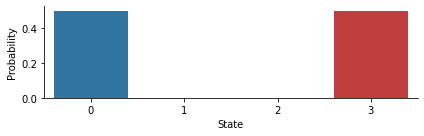

In [6]:
circ = Circuit(2).H(0).CX(0,1)

backend = AerStateBackend()
result_state = backend.run_circuit(circ).get_state()

plot_state_probs(result_state)

## Parameterized and Control Gates

In [7]:
from pytket import OpType   # more advanced gates are available through OpType Enum

circ = Circuit(3)

circ.Rx(0.5, 0) # 1/2 rotation on Bloch sphere, i.e. pi/2 rotation around x-axis
circ.CRz(0.3, 1, 2) # controlled Rz gate
circ.add_gate(OpType.CnX, [0, 2, 1]) #two control qubits and the target qubit, via add gate method

render_circuit_jupyter(circ)

## Device Specific Gates

In the case of the Quantinuum devices

In [8]:
circ = Circuit(4)

circ.add_gate(OpType.ZZPhase, 0.7, [0, 2])
circ.add_gate(OpType.ZZMax, [1, 3])
circ.add_gate(OpType.PhasedX, [-0.1, 0.5], [3])

render_circuit_jupyter(circ)

## Noiseless Simulator

AerSimulator backend can mimic the execution of an actual device.

In [9]:
###########################################
# Needed code in order to plot results
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
    
def plot_counts(counts):
    counts_record = [{"State":state, "Count":count} for state, count in counts.items()]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x='State', y='Count', kind='bar', data=count_df, aspect = 3, height=2)
    plt.show()
####################################################################### 

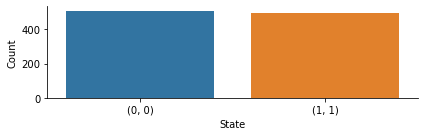

Counter({(0, 0): 508, (1, 1): 492})


In [10]:
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()

circ = Circuit(2,2).H(0).CX(0,1).measure_all()
render_circuit_jupyter(circ)

result_counts = backend.run_circuit(circ, n_shots=1000).get_counts()
plot_counts(result_counts)
print(result_counts)

## Changing between pytket and Qiskit circuit representation

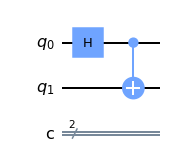

In [11]:
from qiskit import QuantumCircuit

qiskit_circ = QuantumCircuit(2, 2)
qiskit_circ.h(0)
qiskit_circ.cx(0, 1)

qiskit_circ.draw(output='mpl')

In [12]:
from pytket.extensions.qiskit import qiskit_to_tk

tket_circ = qiskit_to_tk(qiskit_circ)
tket_circ.H(0)
tket_circ.measure_all()

render_circuit_jupyter(tket_circ)

In [13]:
from pytket.extensions.qiskit import tk_to_qiskit
from qiskit import Aer
from qiskit import assemble

sv_sim = Aer.get_backend('aer_simulator')

tket_circ = Circuit(3).X(0).H(2).CX(0,1)
qiskit_circ = tk_to_qiskit(tket_circ)
qiskit_circ.measure_all()

qobj = assemble(qiskit_circ, shots=1000)
job = sv_sim.run(qobj)
hist = job.result().get_counts()
print(hist)

{'111': 475, '011': 525}


## OpenQASM

In [14]:
from pytket.qasm import circuit_from_qasm, circuit_to_qasm, circuit_to_qasm_str

circ = circuit_from_qasm('H2JordanWignerMapper.qasm')
render_circuit_jupyter(circ)

## Circuit Analyzis

In [15]:
print(f"Number of gates = {circ.n_gates}")
print(f"Circuit depth = {circ.depth()}")
print(f"Number of CX gates = {circ.n_gates_of_type(OpType.CX)}")

render_circuit_jupyter(circ)

Number of gates = 150
Circuit depth = 83
Number of CX gates = 56


# Day 1 Homework:

1. Sign up for an IBMQ account to get free access to some of IBMs' superconducting quantum computers: https://quantum-computing.ibm.com/
2. Construct a circuit and save it as a QASM file. Then open it and check that it worked.
3. Create a circuit for a problem you have discussed this semester (or one of your interest) and evaluate it with a classical simulator. Did you get the expected result?